In [47]:
import sys
sys.path.append("../src/")
import numpy as np
import pandas as pd
from scipy.special import gamma
import utils as ut
import fBm_stats as fbms
import matplotlib.pyplot as plt
plt.style.use("plot_style.mplstyle")


data_path = "../data/"
h_s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

100%|██████████| 10/10 [00:00<00:00, 1798.05it/s]


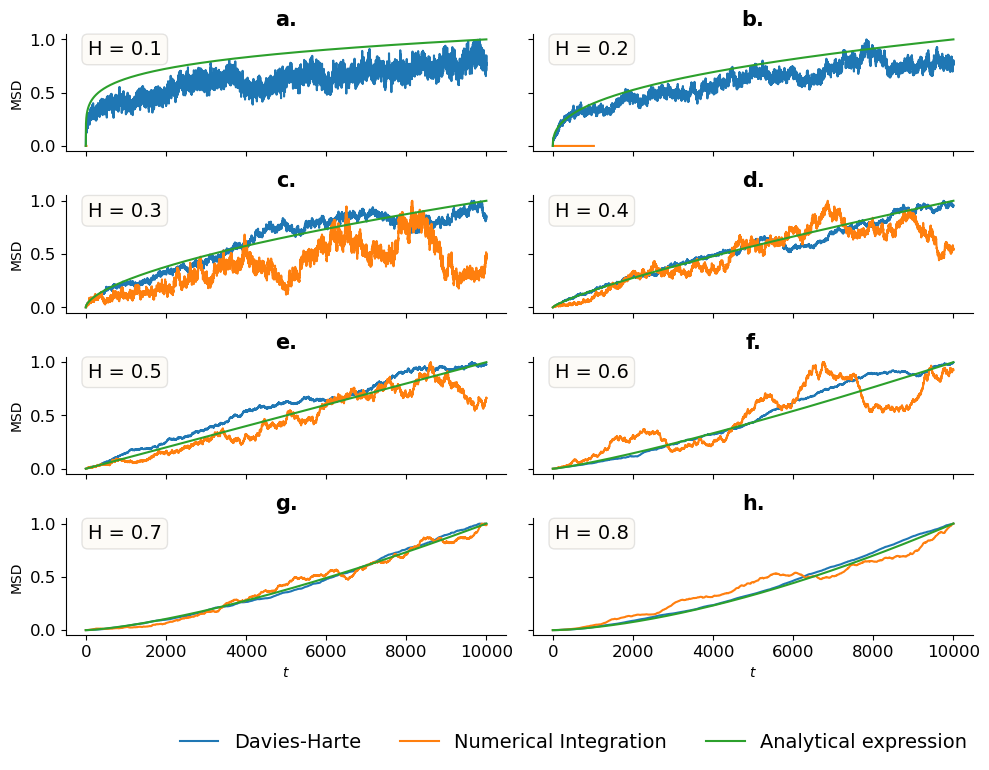

In [2]:
fig, ax = plt.subplots(int(len(h_s)/2), 2, sharex = True, sharey = True, figsize = (10,7))
col = 0
row = 0
panels = ["a.", "b.", "c.", "d.", "e.", "f.", "g.", "h."]
for i, h in enumerate(h_s):
    df_dh = ut.read_hdf5_data(data_path + f"fBm_dh-h-{h}-100.hdf5").set_index("t")
    df_in = ut.read_hdf5_all(h, data_path, 1, 10).set_index("t")
    msd_dh = fbms.msd(df_dh)
    msd_in = fbms.msd(df_in)
    
    t = df_in.index
    msd_anal = t**(2*h)
    msd_anal = msd_anal/max(msd_anal)
    
    axi = ax[row][col]

    axi.plot(t,msd_dh, label = "Davies-Harte")
    axi.plot(t,msd_in, label = "Numerical Integration")
    axi.plot(t,msd_anal, label = "Analytical expression")
    axi.set_title(panels[i])
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)
    axi.text(0.05, 0.95, f"H = {h}", transform=axi.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    if row == len(h_s)/2 - 1: axi.set_xlabel("$t$")

    if col == 1: row += 1; col = 0
    else: col += 1; axi.set_ylabel("MSD")


fig.tight_layout()
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.99, -0.03), ncol = len(h_s)/2)


# Normalization constant

$$cov(B_H(t), B_H(s)) = \frac{\sigma_0^2\Gamma(2-2H)}{4H\Gamma(\frac{3}{2}-H)\Gamma(\frac{1}{2}+H)}(t^{2H}+s^{2H}-|t-s|^{2H})$$ 

$$E[B_H^2(t)] = \frac{\sigma_0^2\Gamma(2-2H)}{2H\Gamma(\frac{3}{2}-H)\Gamma(\frac{1}{2}+H)}t^{2H}$$ 



In [101]:
def get_sigma_0(H, use_zeta = True):
    
    df_dh = ut.read_hdf5_data(data_path + f"fBm_dh-h-{H}-1000.hdf5").set_index("t")
    
    mean = df_dh.mean(axis = 1)
    msd = (df_dh**2).mean(axis = 1)
    t = np.array(msd.index)
    if use_zeta:
        msd_anl = 2*zeta(H)*t**(2*H)
    else:
        msd_anl = t**(2*H)
    
    fig, ax = plt.subplots(1,3, figsize=(9,3))
    ax[0].plot(t, msd, label = "Sim.")
    ax[0].plot(t, msd_anl, label = "Anl.")
    ax[0].set_xlabel("t")
    ax[0].set_xlabel("MSD")
    ax[0].legend(loc = "upper left")

    sigma2_0 = np.mean((msd_anl/msd)[5:])

    ax[1].plot(t, msd_anl/msd)
    ax[1].axhline(y = sigma2_0, color = "red")
    ax[1].set_xlabel("t")
    ax[1].set_xlabel("Scale factor")

    ax[2].hist(msd_anl/msd, orientation="horizontal")
    ax[2].axhline(y = sigma2_0, color = "red")
    ax[1].set_xlabel("t")
    ax[1].set_xlabel("Dist. Scale factor")
    
    fig.suptitle("H = " + str(H))
    
    
    
    return pd.DataFrame({"H":[H], "sigma2_0": [sigma2_0]})

,H,sigma2_0
0,0.1,3.483521
1,0.2,1.927540
2,0.3,1.467406
3,0.4,1.082642
4,0.5,0.962532
5,0.6,0.893948
6,0.7,0.979074
7,0.8,1.230792
8,0.9,1.969380


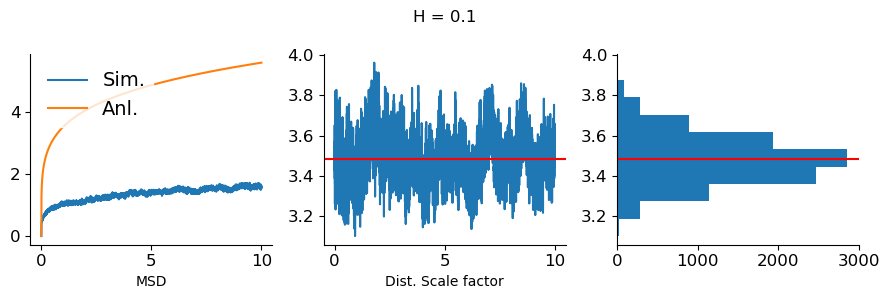

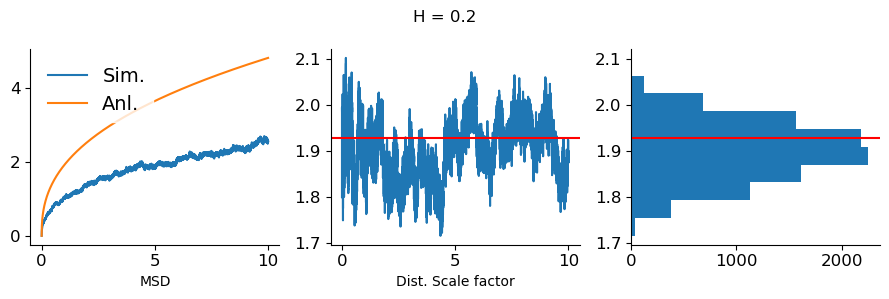

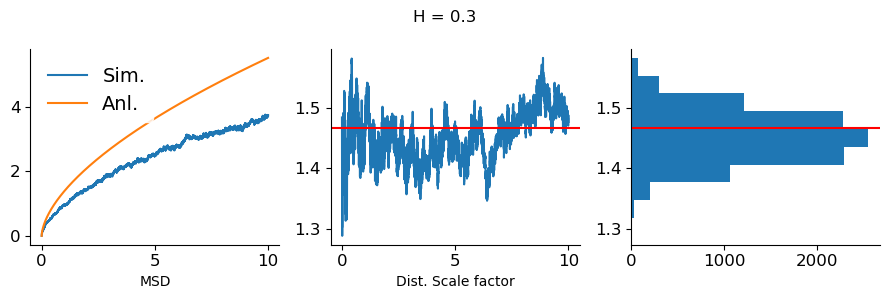

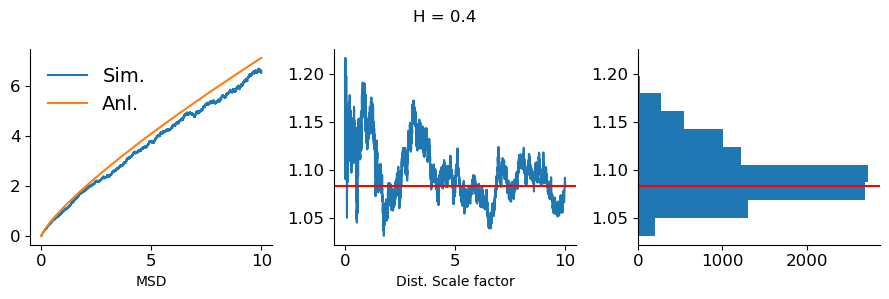

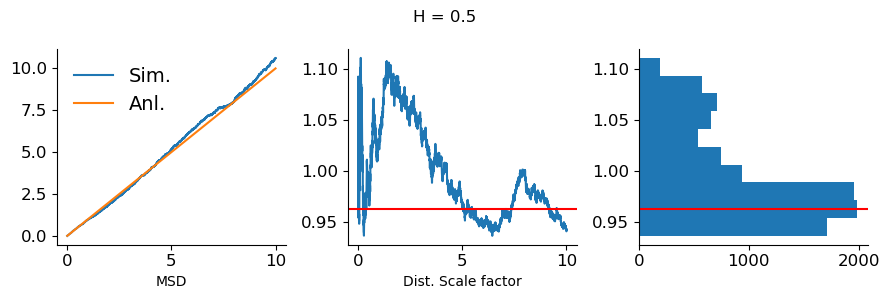

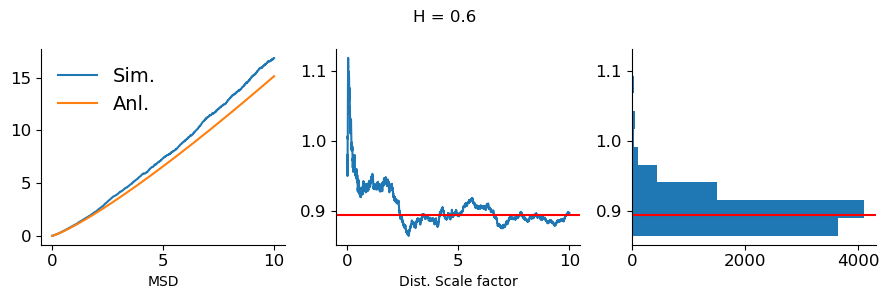

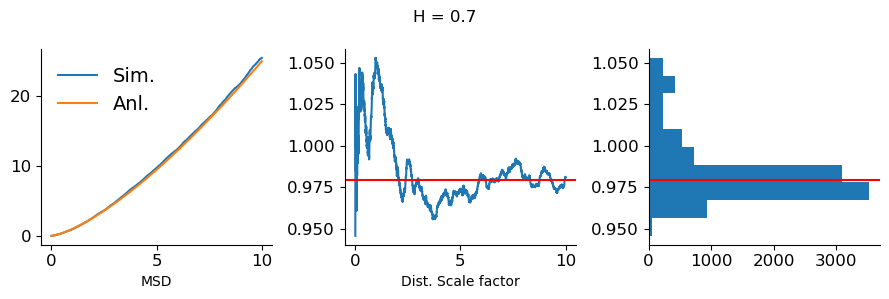

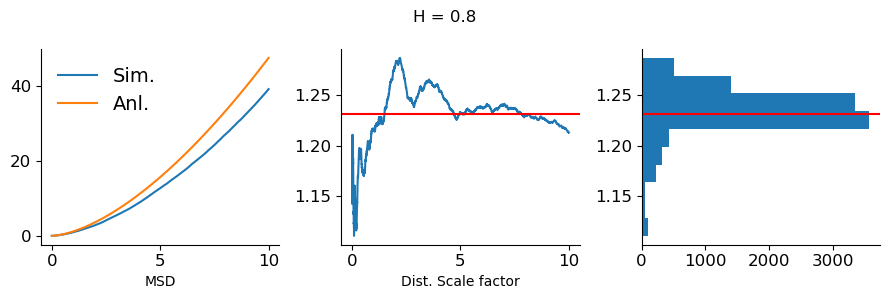

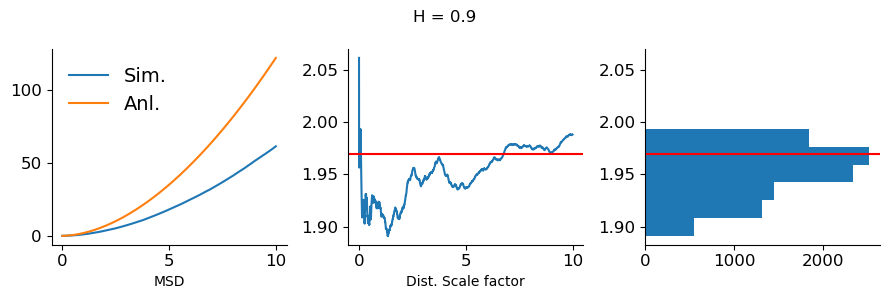

In [106]:
df = pd.DataFrame()
df = pd.concat([df,get_sigma_0(0.1)])
df = pd.concat([df,get_sigma_0(0.2)])
df = pd.concat([df,get_sigma_0(0.3)])
df = pd.concat([df,get_sigma_0(0.4)])
df = pd.concat([df,get_sigma_0(0.5)])
df = pd.concat([df,get_sigma_0(0.6)])
df = pd.concat([df,get_sigma_0(0.7)])
df = pd.concat([df,get_sigma_0(0.8)])
df = pd.concat([df,get_sigma_0(0.9)])
df.reset_index(drop = True, inplace = True)
df


/tmp/ipykernel_387941/1022739834.py:2: RuntimeWarning: divide by zero encountered in divide
  return gamma(2 - 2*H) /(4 * H * gamma(1.5 - H) * gamma(0.5 + H))


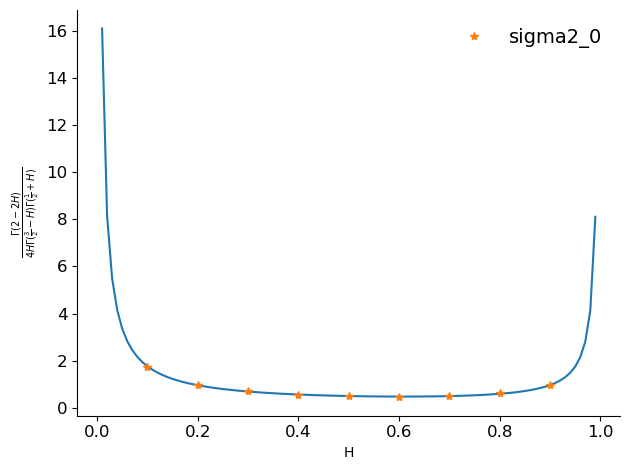

In [113]:
H = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
ax.plot(H, zeta(H))
((df.set_index("H"))/2).plot(ax = ax, ls = "", marker = "*")
plt.xlabel(r"H")
plt.ylabel(r"$\frac{\Gamma(2-2H)}{4H\Gamma(\frac{3}{2}-H)\Gamma(\frac{1}{2}+H)}$");

,H,sigma2_0
0,0.1,0.988378
1,0.2,1.005252
2,0.3,1.060743
3,0.4,0.959002
4,0.5,0.962532
5,0.6,0.936747
6,0.7,0.983906
7,0.8,1.034250
8,0.9,1.020265


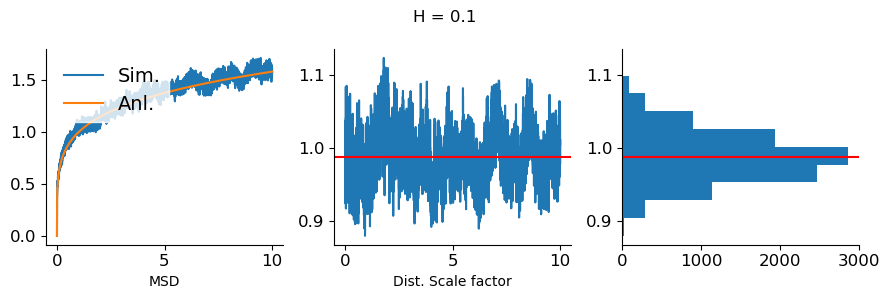

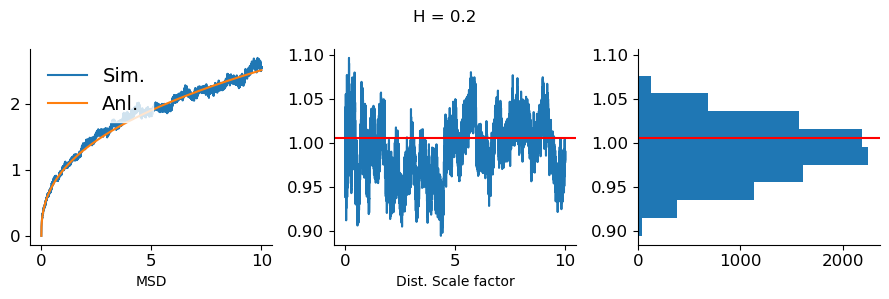

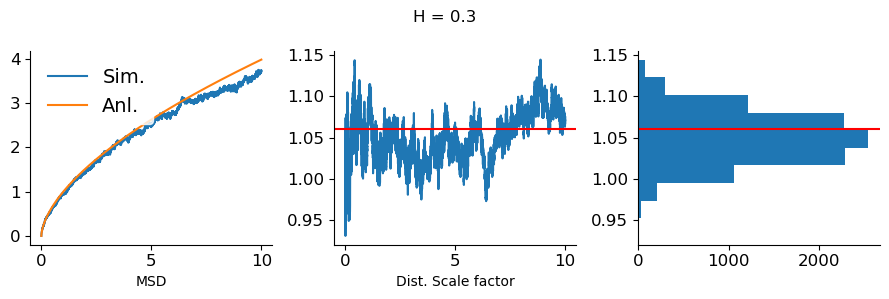

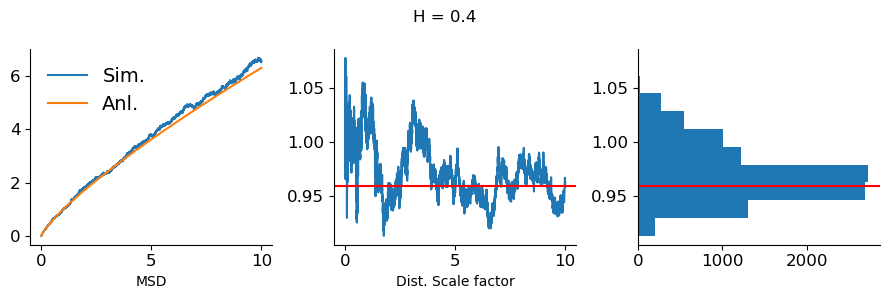

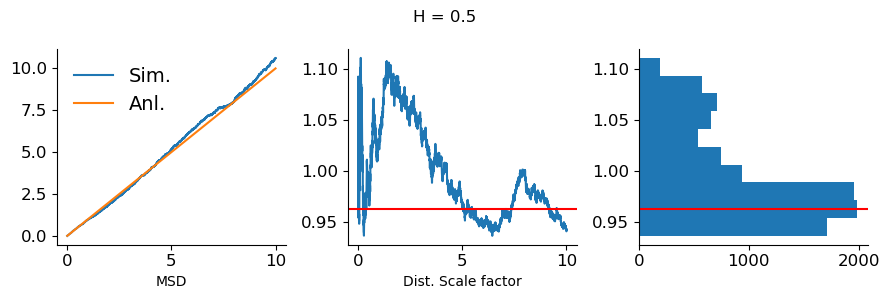

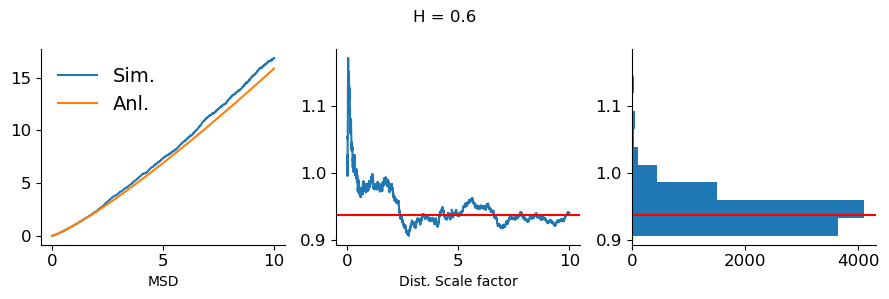

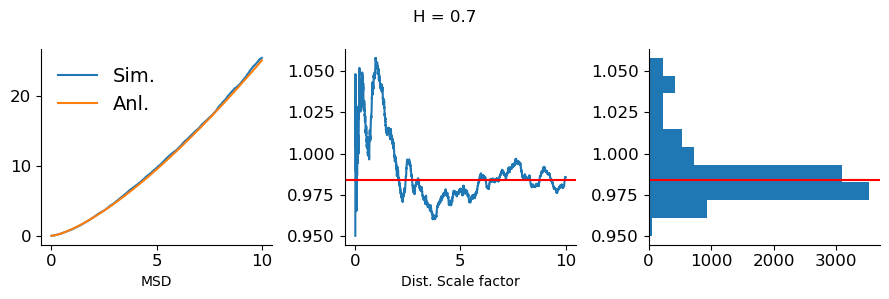

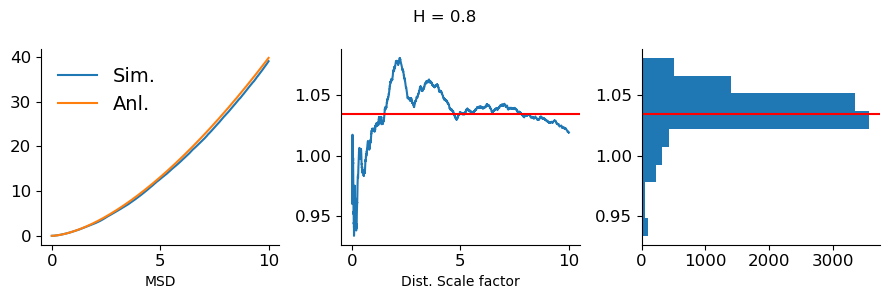

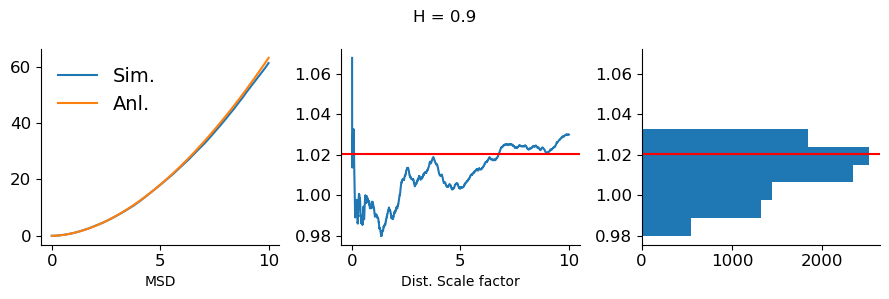

In [103]:
df = pd.DataFrame()
df = pd.concat([df,get_sigma_0(0.1, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.2, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.3, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.4, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.5, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.6, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.7, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.8, use_zeta = False)])
df = pd.concat([df,get_sigma_0(0.9, use_zeta = False)])
df.reset_index(drop = True, inplace = True)
df